# Método da Bissecção

O método da bissecção é uma técnica numérica para encontrar raízes de funções contínuas.  
Ele funciona dividindo repetidamente um intervalo em duas partes e selecionando a subparte onde a raiz está localizada.  
Este processo continua até que a raiz seja encontrada com uma precisão desejada.

## Importação das Bibliotecas

In [2]:
!pip install numpy matplotlib tabulate sympy

  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sys
import os

# Obtém o caminho absoluto do diretório do notebook
notebook_dir = os.path.abspath('')

# Adiciona o diretório pai ao sys.path para reconhecer "Graph"
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np
import sympy as sp
from tabulate import tabulate
from Graph.graph import plotar_funcao

## Implementação do Método da Bisseção

In [2]:
def bissecao(f, a, b, tol=1e-6):
    """
    Implementa o método da bisseção para encontrar a raiz de uma função.
    
    Parâmetros:
    f  -- Função contínua
    a  -- Extremidade esquerda do intervalo
    b  -- Extremidade direita do intervalo
    tol -- Tolerância para o erro (padrão: 1e-6)
    
    Retorna:
    raiz aproximada e tabela com as iterações
    """
    if f(a) * f(b) >= 0:
        raise ValueError("O intervalo não contém uma raiz ou possui múltiplas raízes.")
    
    max_iter = int(np.ceil(np.log2((b - a) / tol)))
    iter = 0
    tabela = []
    raiz_anterior = None
    
    while True:
        iter += 1
        c = (a + b) / 2
        erro_absoluto = abs(b - a)
        erro_relativo = abs((c - raiz_anterior) / c) if raiz_anterior is not None else None
        tabela.append([iter, a, b, c, f(c), abs(b - a), erro_absoluto, erro_relativo])
        raiz_anterior = c
        
        if erro_absoluto < tol:
            break
        
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    return c, tabela, max_iter

## Aplicação do Método

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in log
  return x*log(x) - 1
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in scalar multiply
  return x*log(x) - 1


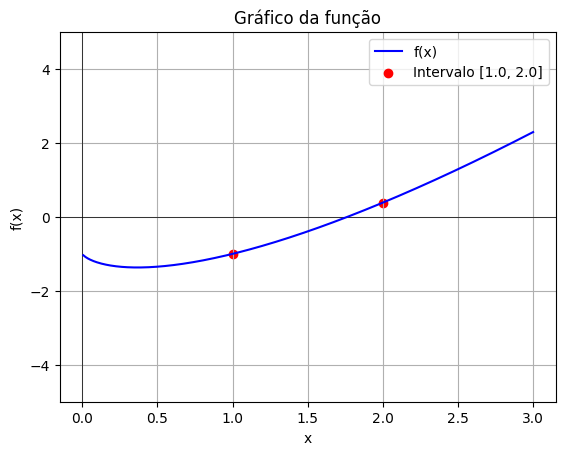

  Iteração       a       b       c     f(c)    Erro    Erro Absoluto    Erro Relativo
----------  ------  ------  ------  -------  ------  ---------------  ---------------
         1  1.0000  2.0000  1.5000  -0.3918  1.0000           1.0000
         2  1.5000  2.0000  1.7500  -0.0207  0.5000           0.5000           0.1429
         3  1.7500  2.0000  1.8750   0.1786  0.2500           0.2500           0.0667
         4  1.7500  1.8750  1.8125   0.0779  0.1250           0.1250           0.0345
         5  1.7500  1.8125  1.7812   0.0283  0.0625           0.0625           0.0175
         6  1.7500  1.7812  1.7656   0.0038  0.0312           0.0312           0.0088
         7  1.7500  1.7656  1.7578  -0.0085  0.0156           0.0156           0.0044
         8  1.7578  1.7656  1.7617  -0.0024  0.0078           0.0078           0.0022
         9  1.7617  1.7656  1.7637   0.0007  0.0039           0.0039           0.0011
        10  1.7617  1.7637  1.7627  -0.0008  0.0020           0.0020   

In [3]:
# Entrada do usuário
x = sp.Symbol('x')
expressao = input("Digite a função em termos de x (ex: sin(x) + exp(x)): ")
funcao = sp.lambdify(x, sp.sympify(expressao), 'numpy')

a = float(input("Digite o limite inferior do intervalo: "))
b = float(input("Digite o limite superior do intervalo: "))
tol = float(input("Digite o limite de erro: "))

plotar_funcao(funcao, a, b)

# Aplicando o método da bisseção
raiz, tabela, max_iter = bissecao(funcao, a, b, tol)

# Exibindo resultados
print(tabulate(tabela, headers=["Iteração", "a", "b", "c", "f(c)", "Erro", "Erro Absoluto", "Erro Relativo"], floatfmt=".4f"))
print(f"Raiz aproximada: {raiz:.4f}")
print(f"Máximo de Iterações: {max_iter}")